# Convolutional NN

In [1]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot


from src.si.data import Dataset
from si.data.dataset import summary
from si.util.util import to_categorical

Load the MNIST dataset

In [2]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [3]:
train,test = load_mnist(500)

In [4]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.y = to_categorical(train.y)

In [5]:
preprocess(train)
preprocess(test)

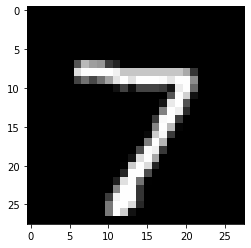

In [6]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [7]:
from si.supervised import NN, Dense, Activation, Conv2D, Flatten
from si.util import Tanh, Sigmoid

Build the model

In [8]:
net = NN(epochs=2000,lr=0.1,verbose=False)
net.add(Conv2D((28, 28,1), (3, 3), 1))  
net.add(Activation(Tanh()))
net.add(Flatten())                     
net.add(Dense(26*26*1, 100))           
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

Train the model

In [ ]:
net.fit(train)

ch 32/2000, error= 0.11257067404327821epoch 34/2000, error= 0.10722573731524479epoch 36/2000, error= 0.10357777909637574epoch 38/2000, error= 0.10105349823998835epoch 40/2000, error= 0.09926995520024232epoch 42/2000, error= 0.09797997906018625epoch 44/2000, error= 0.09702465385509887epoch 46/2000, error= 0.09630077941036883epoch 48/2000, error= 0.09574024173893565epoch 50/2000, error= 0.09529723789510489epoch 52/2000, error= 0.09494037131491444epoch 54/2000, error= 0.09464771336782646epoch 56/2000, error= 0.09440367281572014epoch 58/2000, error= 0.09419697787417666epoch 60/2000, error= 0.09401935256898311epoch 62/2000, error= 0.09386463327880563epoch 64/2000, error= 0.09372816902250965epoch 66/2000, error= 0.09360640771132386epoch 68/2000, error= 0.09349660627806103epoch 70/2000, error= 0.09339662462878996epoch 72/2000, error= 0.0933047771709282epoch 74/2000, error= 0.0932197244584196epoch 76/2000, error= 0.09314039317016512epoch 78/2000, error= 0.0930659163574892epoch 80/2000, error= 

In [ ]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.y[0:3])

In [ ]:
conv = net.layers[0]

In [ ]:
plot_img(conv.forward(test.X[:1]),shape=(26,26))